In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

In [7]:
dataSet = pd.read_csv("Social_Network_Ads.csv")
print(dataSet.info())
dataSet.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   User ID          400 non-null    int64  
 1   Gender           400 non-null    object 
 2   Age              400 non-null    float64
 3   EstimatedSalary  400 non-null    float64
 4   Purchased        400 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 15.8+ KB
None


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


In [8]:
# dummy Variable
dataSet = pd.get_dummies(dataSet)
dataSet.head(5)

,User ID,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,15624510,19.0,19000.0,0,0,1
1,15810944,35.0,20000.0,0,0,1
2,15668575,26.0,43000.0,0,1,0
3,15603246,27.0,57000.0,0,1,0
4,15804002,19.0,76000.0,0,0,1


In [9]:
# delete User ID
dataSet = dataSet.drop( columns=["User ID"] )
dataSet.head(5)

# check missing value
print(dataSet.isna().any())

Age                False
EstimatedSalary    False
Purchased          False
Gender_Female      False
Gender_Male        False
dtype: bool


In [10]:
# split Independent and dependent Variable 

IndependentV = dataSet.drop(columns=["Purchased"]).values
dependentV = dataSet["Purchased"].values

In [11]:
from sklearn.model_selection import train_test_split
IndependentV_train, IndependentV_test, dependentV_train, dependentV_test = train_test_split(IndependentV, dependentV, test_size=0.2, random_state=0)

In [13]:
from sklearn.ensemble import RandomForestClassifier
# n_estimators : The number of trees in the forest.
model = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)
model.fit(IndependentV_train, dependentV_train)
predict_result = model.predict(IndependentV_test)

<Axes: >

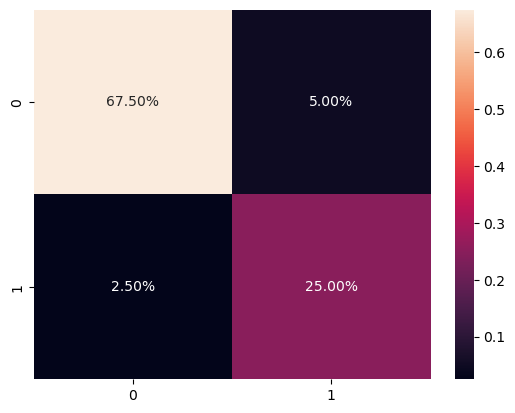

In [18]:
from sklearn.metrics import confusion_matrix
ConM = confusion_matrix(dependentV_test, predict_result)

import seaborn as sns
sns.heatmap(ConM/np.sum(ConM), annot=True, fmt=".2%")